**Due: 4 PM on Wednesday, 17 Feb 2016**

The usual warnings apply - the homework is not officially released until 11 Feb 2016, and we may make changes till then.

Instructions
-----

Write code to solve all problems. The grading rubric includes the following criteria:

- Correctness
- Readability
- Efficiency

Please do not copy answers found on the web or elsewhere as it will not benefit your learning. Searching the web for general references etc is OK. Some discussion with friends is fine too - but again, do not just copy their answer. 

**Honor Code: By submitting this assignment, you certify that this is your original work.**

**Question 1 (20 points)**. 

Euclid's algorithm for finding the greatest common divisor of two numbers is

```python
gcd(a, 0) = a
gcd(a, b) = gcd(b, a modulo b)
```

- Write a function to find the greatest common divisor in Python (8 points)
- What is the greatest common divisor of 17384 and 1928? (2 point)
- Write a function to calculate the least common multiple (8 points)
- What is the least common multiple of 17384 and 1928? (2 point)

In [8]:
def gcd(a, b):
    """Greatest common divisor."""
    if b == 0:
        return a
    else:
        return gcd(b, a % b)

In [9]:
gcd(17384, 1928)

8

In [10]:
def lcm(a, b):
    """Least common multiple."""
    return a * b // gcd(a, b)

In [11]:
lcm(17384, 1928)

4189544

**Question 2 (20 points)**. 

Consider the linear transformation $f(x)$ on $\mathbb{R}^3$ that takes the standard basis $\left\{e_1,e_2,e_3\right\}$ to $\left\{v_1,v_2,v_3\right\}$ where

$$v_1=\left(\begin{matrix}10\\-10\\16\end{matrix}\right), v_2=\left(\begin{matrix}2\\-5\\20\end{matrix}\right) \textrm {and } v_3=\left(\begin{matrix}1\\-4\\13\end{matrix}\right)$$

1. Write a matrix $A$ that represents the same linear transformaton. (4 points)

2. Compute the rank of $A$ using two different methods (do not use `matrix_rank`!). (4 points)

3. Find the eigenvalues and eigenvectors of $A$. (4 points)

4. What is the matrix representation of $f$ with respect to the eigenbasis? (48 points)

In [13]:
A = np.array([[10,-10,16], [2, -5, 20], [1, -4, 13]]).T
A

array([[ 10,   2,   1],
       [-10,  -5,  -4],
       [ 16,  20,  13]])

In [14]:
import scipy.linalg as la

#### Number of pivots after LU

In [15]:
P, L, U = la.lu(A)
np.diag(U)

array([ 16.        , -10.5       ,  -0.96428571])

#### Number of non-zero eigenvalues

In [16]:
np.real_if_close(la.eigvals(A))

array([ 9.,  3.,  6.])

#### Determiniant is not zero so must be full rank

In [17]:
la.det(A)

161.9999999999999

#### Find eigenvalues and eigenvectos

In [18]:
vals, vecs = la.eig(A)

In [19]:
vals

array([ 9.+0.j,  3.+0.j,  6.+0.j])

In [20]:
vecs

array([[ -5.77350269e-01,  -1.08920744e-16,  -1.20385853e-01],
       [  5.77350269e-01,   4.47213595e-01,  -2.40771706e-01],
       [ -5.77350269e-01,  -8.94427191e-01,   9.63086825e-01]])

#### Matrix representation of f with respect to the eigenbasis

In [21]:
np.diag(np.real_if_close(vals))

array([[ 9.,  0.,  0.],
       [ 0.,  3.,  0.],
       [ 0.,  0.,  6.]])

**Exercise 3 (20 pts)**. Avodiing catastrophic cancellation.

Read the Wikipedia entry on [loss of significance](https://en.wikipedia.org/wiki/Loss_of_significance). Then answer the following problem:

The tail of the standard logistic distributon is given by $1 - F(t) = 1 - (1+e^{-t})^{-1}$.

- Define a function `f1` to calculate the tail probability of the logistic distribution using the formula given above
- Use [`sympy`](http://docs.sympy.org/latest/index.html) to find the exact value of the tail distribution (using the same symbolic formula) to 20 decimal digits
- Calculate the *relative error* of `f1` when $t = 25$ (The relative error is given by `abs(exact - approximate)/exact`)
- Rewrite the expression for the tail of the logistic distribution using simple algebra so that there is no risk of cancellation, and write a function `f2` using this formula. Calculate the *relative error* of `f2` when $t = 25$. 
- How much more accurate is `f2` compared with `f1` in terms of the relative error?

In [33]:
def f1(t):
    """Calculates tail probabilty of the logistic distribution."""
    return 1 - 1.0/(1 + np.exp(-t))

def fsymb(t, n=20):
    """Exact value to n decimal digits using symbolic algebra."""
    from sympy import exp
    return (1 - 1/(1 + exp(-t))).evalf(n=n)

def f2(t):
    """Calculates tail probabilty of the logistic distribution - no cancellation."""
    return 1/(1 + np.exp(t))

r1 = abs(fsymb(25) - f1(25))/fsymb(25)
r2 = abs(fsymb(25) - f2(25))/fsymb(25)

print("Relative error of f1:\t%.16f" % r1)
print("Relative error of f2\t%.16f" % r2)
print("f2 improvieemnt over f1\t%g" % (r1/r2))

Relative error of f1:	0.0000041759147666
Relative error of f2	0.0000000000000001
f2 improvieemnt over f1	3.66247e+10


**Exercise 4 (40 pts)**. One of the goals of the course it that you will be able to implement novel algorihtms from the literature. 

- Implement the mean-shift algorithm in 1D as described [here](http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/TUZEL1/MeanShift.pdf). 
    - Use the following function signature
    ```python
    def mean_shift(xs, x, kernel, max_iters=100, tol=1e-6):
    ```
    - xs is the data set, x is the starting location, and kernel is a kernel function
    - tol is the difference in $||x||$ across iterations
- Use the following kernels with bandwidth $h$ (a default value of 1.0 will work fine)
    - Flat - return 1 if $||x|| < h$ and 0 otherwise
    - Gaussian 
    $$\frac{1}{\sqrt{2 \pi h}}e^{\frac{-||x||^2}{h^2}}$$
    - Note that $||x||$ is the norm of the data point being evaluated minus the current value of $x$
- Use both kernels to find all 3 modes of the data set in `x1d.npy`
- Modify the algorihtm abd/or kernels so that it now works in an arbitrary number of dimensions.
- Uset both kernels to find all 3 modes of the data set in `x2d.npy`
- Plot the path of successive intermeidate solutions of the mean-shift algorithm starting from `x0 = (-4, 5)` until it converges onto a mode in the 2D data for each kernel. Superimposet the path on top of a contour plot of the data density. Repeat for `x0 = (0, 0)` and `x0 = (10, 10)` .

In [34]:
xs1 = np.load('x1d.npy')
xs2 = np.load('x2d.npy')

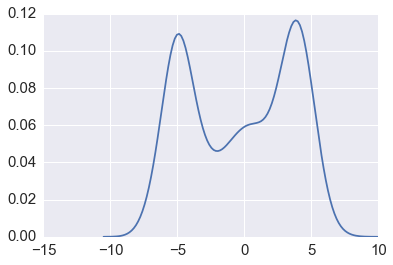

In [35]:
sns.kdeplot(xs1)
pass

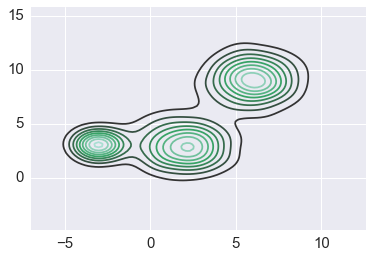

In [36]:
sns.kdeplot(xs2)
pass

### Using explicit looping and just-in-time compilation

In [37]:
from numba import jit

In [38]:
@jit
def flat(xs, x, h):
    """Flat kernel."""
    h2 = h*h
    vs = xs - x
    n = len(vs)
    vals = np.zeros(n, 'float')
    for i in range(n):
        vals[i] = np.sum(vs[i] * vs[i]) < int(h2)
    return vals

In [39]:
@jit
def gauss(xs, x, h):
    """Gaussian kernel."""
    h2 = h*h
    vs = xs - x
    n = len(vs)
    vals = np.zeros(n, 'float')
    for i in range(n):
        vals[i] = np.exp(-np.sum(vs[i] * vs[i])/(2*h2))
    return vals

### Using vectorization with genearlized universal functiions

We will revisit generalized universal functions `gufuncs` when we come to the module on using `numba` for just-in-time compilation.

In [107]:
from numpy.core.umath_tests import inner1d

# Note that inner1d only works for vectors

def flat2(xs, x, h):
    """Flat kernel using vectorization."""
    if len(x) == 1: return flat(xs, x, h)
    vs = xs - x
    return inner1d(vs, vs) < h*h

In [106]:
def gauss2(xs, x, h):
    """Gaussian kernel using vectorization."""
    if len(x) == 1: return gauss(xs, x, h)
    vs = xs - x
    return np.exp(-inner1d(vs, vs)/(2*h*h))

### Mean shift algorithm

In [176]:
def mean_shift(xs, x0, kernel, h=1, max_iter=10, tol=1e-6):
    """Mean shift algorithm."""
    x = np.array(x0)
    path = [x]
    for i in range(max_iter):
        k = kernel(xs, x, h)
        # Add axes as necessary for broadcasting to work
        for d in range(len(x)-1):
            k = k[:, None]
        m = np.sum(xs*k, 0)/np.sum(k) - x
        x = x + m
        path.append(x)
        if np.sqrt(m@m) < tol:
            break
    return np.array(path)

#### Find modes for 1D

In [177]:
starts1 = [[-8], [0], [5]]

In [178]:
for x0 in starts1:
    print(mean_shift(xs1, x0, flat)[-1])

[-5.03061196]
[ 0.30627115]
[ 3.98327832]


In [179]:
for x0 in starts1:
    print(mean_shift(xs1, x0, gauss)[-1])

[-4.87768066]
[ 0.63825792]
[ 3.80883561]


#### Find modes for 2D

In [180]:
starts2 = [[0,0], [-4,5], [10,10]]

In [181]:
for x0 in starts2:
    print(mean_shift(xs2, x0, flat2)[-1])

[ 1.08912603  2.10212326]
[-3.0850032   3.05637095]
[ 7.25458343  9.78466892]


In [182]:
for x0 in starts2:
    print(mean_shift(xs2, x0, gauss2)[-1])

[ 2.04283149  2.82267586]
[-2.97955907  3.06045955]
[ 6.05705551  9.06816593]


### Plot mean shift trajectory

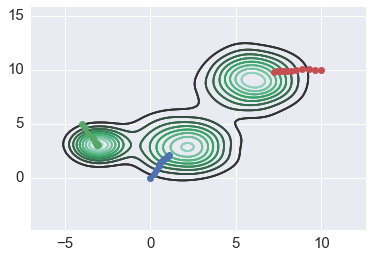

In [183]:
for x0 in starts2:
    path = mean_shift(xs2, x0, flat2)
    sns.kdeplot(xs2)
    plt.plot(path[:,0], path[:, 1], '-o')

#### Increasing badnwidth helps flat kernel

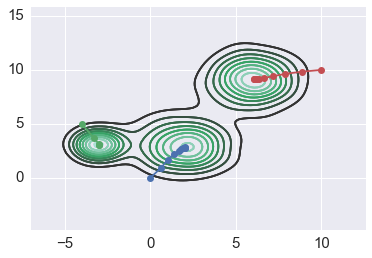

In [184]:
for x0 in starts2:
    path = mean_shift(xs2, x0, flat2, h=2)
    sns.kdeplot(xs2)
    plt.plot(path[:,0], path[:, 1], '-o')

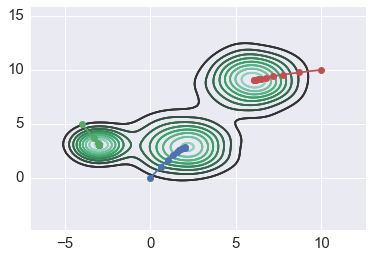

In [185]:
for x0 in starts2:
    path = mean_shift(xs2, x0, gauss2)
    sns.kdeplot(xs2)
    plt.plot(path[:,0], path[:, 1], '-o')